In [1]:
import tensorflow as tf
keras = tf.keras
from keras.layers import SimpleRNN, Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
from keras import Sequential, Input
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


2023-10-10 21:59:39.255967: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-10 21:59:40.629938: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Q1
### A

In [2]:
def gen_time_series(sample_size: int, n_steps: int):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)

    return series[..., np.newaxis].astype(np.float32)


In [3]:
data = gen_time_series(10000, 51)


In [4]:
data[0]


array([[-0.34917745],
       [-0.09494269],
       [ 0.13007222],
       [ 0.33317357],
       [ 0.4931553 ],
       [ 0.5685146 ],
       [ 0.5409047 ],
       [ 0.49118164],
       [ 0.4034384 ],
       [ 0.24854226],
       [ 0.15656188],
       [ 0.11386947],
       [ 0.03699638],
       [ 0.01187767],
       [-0.08158278],
       [-0.12883589],
       [-0.1283088 ],
       [-0.22677714],
       [-0.40901074],
       [-0.48646325],
       [-0.5555979 ],
       [-0.5432388 ],
       [-0.5365215 ],
       [-0.36325133],
       [-0.15171103],
       [ 0.04956029],
       [ 0.3679362 ],
       [ 0.5678142 ],
       [ 0.6708773 ],
       [ 0.67431545],
       [ 0.6408078 ],
       [ 0.49195135],
       [ 0.36711463],
       [ 0.1543468 ],
       [ 0.01525813],
       [-0.12138142],
       [-0.16130492],
       [-0.20953335],
       [-0.25725332],
       [-0.23038828],
       [-0.27563316],
       [-0.29812714],
       [-0.4235863 ],
       [-0.40865096],
       [-0.43754476],
       [-0

In [5]:
X = data[:, 0:50]
X


array([[[-0.34917745],
        [-0.09494269],
        [ 0.13007222],
        ...,
        [-0.12207834],
        [ 0.09025307],
        [ 0.27791664]],

       [[-0.05918322],
        [-0.1721116 ],
        [-0.22711864],
        ...,
        [ 0.42585674],
        [ 0.34050676],
        [ 0.1757131 ]],

       [[-0.51627266],
        [-0.53810394],
        [-0.53888756],
        ...,
        [-0.21629599],
        [-0.21707523],
        [-0.30235085]],

       ...,

       [[-0.24571703],
        [-0.481385  ],
        [-0.66046286],
        ...,
        [ 0.47051954],
        [ 0.18992552],
        [-0.03456408]],

       [[ 0.5894483 ],
        [ 0.4403053 ],
        [ 0.33995104],
        ...,
        [-0.3809685 ],
        [-0.20793363],
        [-0.05244441]],

       [[-0.31107438],
        [-0.26687083],
        [-0.24508345],
        ...,
        [ 0.47725663],
        [ 0.32029542],
        [ 0.20053948]]], dtype=float32)

In [6]:
y = data[:, -1]
y


array([[ 0.44162652],
       [-0.04999599],
       [-0.29545313],
       ...,
       [-0.17961931],
       [ 0.17241426],
       [ 0.03878654]], dtype=float32)

### B

In [7]:
X_train, X_val, X_test = X[0:7000, :], X[7000:9000, :], X[9000:10000, :]
X_val.shape


(2000, 50, 1)

In [8]:
y_train, y_val, y_test = y[0:7000, :], y[7000:9000, :], y[9000:10000, :]


In [9]:
y_train.shape


(7000, 1)

### C
#### a


In [10]:
fcnn_model = Sequential([
    Flatten(input_shape=[50, 1]),
    Dense(1)
])
fcnn_model.summary()


2023-10-10 21:59:46.058139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-10 21:59:47.517644: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-10 21:59:47.517752: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-10 21:59:47.552648: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:22:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-10 21:59:47.552753: I tensorflow/compile

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (20

In [11]:
fcnn_model.compile(loss="mse", optimizer="adam")


In [12]:
fcnn_hist = fcnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20


2023-10-10 21:59:57.607616: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fb3300d2cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-10 21:59:57.607703: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 6GB, Compute Capability 6.1
2023-10-10 21:59:58.181080: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-10 21:59:58.499439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-10 21:59:59.284781: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


  1/219 [..............................] - ETA: 12:59 - loss: 0.3888

2023-10-10 21:59:59.807672: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


219/219 [==============================] - 5s 6ms/step - loss: 0.1443 - val_loss: 0.0526
Epoch 2/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0351 - val_loss: 0.0245
Epoch 3/20
219/219 [==============================] - 1s 7ms/step - loss: 0.0220 - val_loss: 0.0187
Epoch 4/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0177 - val_loss: 0.0156
Epoch 5/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0149 - val_loss: 0.0132
Epoch 6/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0128 - val_loss: 0.0116
Epoch 7/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0111 - val_loss: 0.0102
Epoch 8/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0097 - val_loss: 0.0089
Epoch 9/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0085 - val_loss: 0.0077
Epoch 10/20
219/219 [==============================] - 1s 6ms/step - loss: 0.0075 - val_loss: 0.0069
Epoch 11/2

In [13]:
fcnn_model.evaluate(X_test, y_test)


32/32 [==============================] - 0s 4ms/step - loss: 0.0046


0.004603728652000427

#### b

In [14]:
rnn1_model = Sequential([
    Input((50, 1)),
    SimpleRNN(1)
])
rnn1_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
rnn1_model.compile(loss="mse", optimizer="adam", metrics=['accuracy'])


In [16]:
rnn1_hist = rnn1_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
219/219 [==============================] - 25s 109ms/step - loss: 0.1758 - accuracy: 0.0000e+00 - val_loss: 0.1522 - val_accuracy: 0.0000e+00
Epoch 2/20
219/219 [==============================] - 23s 103ms/step - loss: 0.1453 - accuracy: 0.0000e+00 - val_loss: 0.1387 - val_accuracy: 0.0000e+00
Epoch 3/20
219/219 [==============================] - 22s 100ms/step - loss: 0.1378 - accuracy: 0.0000e+00 - val_loss: 0.1395 - val_accuracy: 0.0000e+00
Epoch 4/20
219/219 [==============================] - 23s 104ms/step - loss: 0.1386 - accuracy: 0.0000e+00 - val_loss: 0.1398 - val_accuracy: 0.0000e+00
Epoch 5/20
219/219 [==============================] - 23s 106ms/step - loss: 0.1399 - accuracy: 0.0000e+00 - val_loss: 0.1381 - val_accuracy: 0.0000e+00
Epoch 6/20
219/219 [==============================] - 23s 105ms/step - loss: 0.1386 - accuracy: 0.0000e+00 - val_loss: 0.1386 - val_accuracy: 0.0000e+00
Epoch 7/20
219/219 [==============================] - 23s 106ms/step - loss: 0.138

In [17]:
rnn1_model.evaluate(X_test, y_test)


32/32 [==============================] - 1s 14ms/step - loss: 0.1413 - accuracy: 0.0000e+00


[0.14133983850479126, 0.0]

#### c,d

In [18]:
rnn2_model = Sequential([
    Input((50, 1)),
    SimpleRNN(1, return_sequences=True),
    SimpleRNN(1)
])
rnn2_model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 6 (24.00 Byte)
Trainable params: 6 (24.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 6 (24.00

In [19]:
rnn2_model.compile(loss="mse", optimizer="adam")


In [20]:
rnn2_hist = rnn2_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))


Epoch 1/20
219/219 [==============================] - 50s 220ms/step - loss: 0.1029 - val_loss: 0.0840
Epoch 2/20
219/219 [==============================] - 50s 227ms/step - loss: 0.0663 - val_loss: 0.0524
Epoch 3/20
219/219 [==============================] - 52s 237ms/step - loss: 0.0409 - val_loss: 0.0329
Epoch 4/20
219/219 [==============================] - 47s 216ms/step - loss: 0.0267 - val_loss: 0.0230
Epoch 5/20
219/219 [==============================] - 51s 235ms/step - loss: 0.0195 - val_loss: 0.0177
Epoch 6/20
219/219 [==============================] - 49s 223ms/step - loss: 0.0156 - val_loss: 0.0146
Epoch 7/20
219/219 [==============================] - 47s 213ms/step - loss: 0.0133 - val_loss: 0.0128
Epoch 8/20
219/219 [==============================] - 49s 222ms/step - loss: 0.0119 - val_loss: 0.0117
Epoch 9/20
219/219 [==============================] - 50s 229ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 10/20
219/219 [==============================] - 48s 217ms/step - l

In [21]:
rnn2_model.evaluate(X_test, y_test)


 1/32 [..............................] - ETA: 2s - loss: 0.0110

32/32 [==============================] - 1s 45ms/step - loss: 0.0101


0.010136560536921024

#### e

In [22]:
rnn3_model = Sequential([
    Input((50, 1)),
    SimpleRNN(1, return_sequences=True),
    SimpleRNN(1, return_sequences=True),
    SimpleRNN(1)
])
rnn3_model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 50, 1)             3         
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 50, 1)             3         
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
______________________

In [23]:
rnn3_model.compile(loss="mse", optimizer="adam")


In [24]:
rnn3_hist = rnn3_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10


219/219 [==============================] - 90s 397ms/step - loss: 0.1889 - val_loss: 0.1663
Epoch 2/10
219/219 [==============================] - 82s 374ms/step - loss: 0.1587 - val_loss: 0.1527
Epoch 3/10
219/219 [==============================] - 83s 379ms/step - loss: 0.1493 - val_loss: 0.1514
Epoch 4/10
219/219 [==============================] - 85s 388ms/step - loss: 0.1455 - val_loss: 0.1446
Epoch 5/10
219/219 [==============================] - 77s 351ms/step - loss: 0.1433 - val_loss: 0.1452
Epoch 6/10
219/219 [==============================] - 83s 379ms/step - loss: 0.1434 - val_loss: 0.1446
Epoch 7/10
219/219 [==============================] - 80s 364ms/step - loss: 0.1431 - val_loss: 0.1439
Epoch 8/10
219/219 [==============================] - 80s 367ms/step - loss: 0.1432 - val_loss: 0.1450
Epoch 9/10
219/219 [==============================] - 81s 372ms/step - loss: 0.1436 - val_loss: 0.1446
Epoch 10/10
219/219 [==============================] - 79s 361ms/step - loss: 0.1429

In [25]:
rnn3_model.evaluate(X_test, y_test)


32/32 [==============================] - 1s 35ms/step - loss: 0.1430


0.14297938346862793

## Q2

In [26]:
df = pd.read_csv('GOOG.csv')


In [27]:
df.head(5)


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [29]:
# Check null
df.isna().sum()


symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [30]:
# Check duplicates
df.duplicated().any()


False

### A

In [31]:
# Filter data for the years 2020 and 2021
df['date'] = pd.to_datetime(df['date'])
df_2020_2021 = df[(df['date'].dt.year >= 2020) & (df['date'].dt.year <= 2021)]


In [32]:
features = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
df_selected = df_2020_2021[features]


In [33]:
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_selected)


In [34]:
window_size = 30

sequences = []
target = []
for i in range(len(df_norm) - window_size):
    sequences.append(df_norm[i:i+window_size])
    target.append(df_norm[i+window_size])

sequences = np.array(sequences)
target = np.array(target)


In [35]:
X_train, X_test, y_train, y_test = train_test_split(sequences, target, test_size=0.2, random_state=42)


In [36]:
model = Sequential([
    SimpleRNN(units=64, activation='relu', return_sequences=True, input_shape=(window_size, len(features))),
    Dropout(0.2),
    SimpleRNN(units=64, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(units=64, activation='relu'),
    Dropout(0.2),
    Dense(units=len(features))
])
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 30, 64)            4800      
                                                                 
 dropout (Dropout)           (None, 30, 64)            0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 30, 64)            8256      
                                                                 
 dropout_1 (Dropout)         (None, 30, 64)            0         
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 30, 64)            8256      
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 30, 64)            4800      
                                                      

In [37]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [38]:
hist = model.fit(X_train, y_train, epochs=50, batch_size=32,validation_split=0.1)


Epoch 1/50
8/8 [==============================] - 10s 429ms/step - loss: 0.2172 - val_loss: 0.1488
Epoch 2/50
8/8 [==============================] - 3s 326ms/step - loss: 0.1069 - val_loss: 0.0533
Epoch 3/50
8/8 [==============================] - 3s 363ms/step - loss: 0.0678 - val_loss: 0.0439
Epoch 4/50
8/8 [==============================] - 3s 328ms/step - loss: 0.0465 - val_loss: 0.0339
Epoch 5/50
8/8 [==============================] - 3s 318ms/step - loss: 0.0410 - val_loss: 0.0275
Epoch 6/50
8/8 [==============================] - 2s 308ms/step - loss: 0.0387 - val_loss: 0.0355
Epoch 7/50
8/8 [==============================] - 3s 348ms/step - loss: 0.0341 - val_loss: 0.0257
Epoch 8/50
8/8 [==============================] - 2s 278ms/step - loss: 0.0302 - val_loss: 0.0300
Epoch 9/50
8/8 [==============================] - 3s 311ms/step - loss: 0.0313 - val_loss: 0.0278
Epoch 10/50
8/8 [==============================] - 2s 302ms/step - loss: 0.0288 - val_loss: 0.0251
Epoch 11/50
8/8 [=

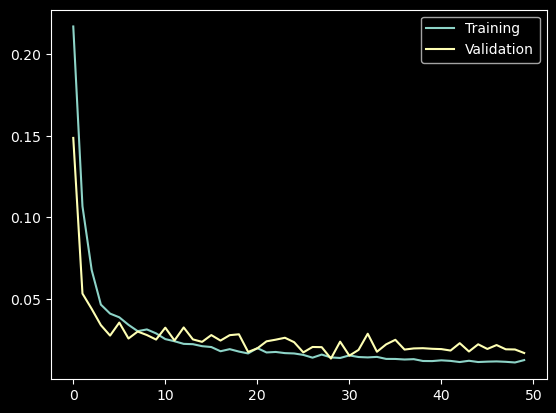

In [39]:
training = hist.history['loss']
validation = hist.history['val_loss']

plt.plot(training, label='Training')
plt.plot(validation, label='Validation')
plt.legend()
plt.show()


In [40]:
predicted_prices = model.predict(X_test)
predicted_prices_actual = scaler.inverse_transform(predicted_prices)


3/3 [==============================] - 3s 59ms/step


### B

In [41]:
mape = mean_absolute_percentage_error(y_test, predicted_prices)
print(f"MAPE: {mape:.2f}%")

mse = mean_squared_error(y_test, predicted_prices)
print(f"MSE: {mse:.2f}")


MAPE: 1379892411487.04%
MSE: 0.01


### C

Good results were seen with 50 epochs and 4 dropouts

### D

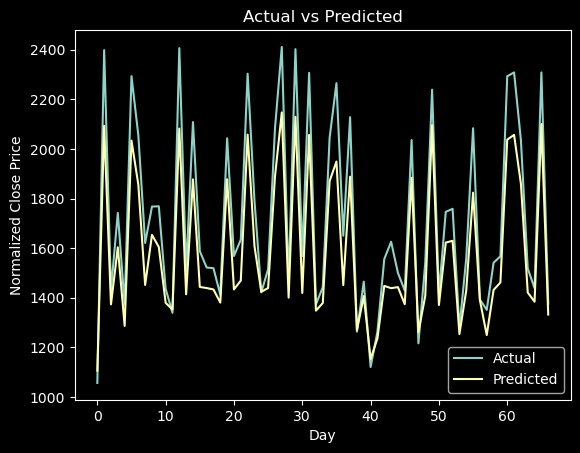

In [42]:
actual_price = scaler.inverse_transform(y_test)

plt.plot(actual_price[:, 0], label='Actual')
plt.plot(predicted_prices_actual[:, 0], label='Predicted')

plt.xlabel('Day')
plt.ylabel('Normalized Close Price')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()
